In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
# class / image - label
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0','1','2','3','4','5','6','7','8','9']
NUM_CLASSES = 10

In [2]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape
y_train[10]

3

In [6]:
from tensorflow.keras.utils import to_categorical

# keras에 입력을 넣어주기 위해
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# 0~1값으로 만들어 주기
x_train = x_train/255.
x_test = x_test/255.

# 출력 노드 설정
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted y.shape = ", y_train.shape)

converted y.shape =  (60000, 10)


In [8]:
# y_train[10] 가 3 이었기 때문에
# to_categorical를 통해 해당하는 값으로 변환해 줌
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
model = keras.Sequential([
    #  (28*28) -> (3,3)*32
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # maxpooling
    keras.layers.MaxPooling2D((2,2)),
    # Layer3
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Layer4
    keras.layers.MaxPooling2D((2,2)),
    # Layer5
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Layer6
    keras.layers.Flatten(),
    # Layer7
    keras.layers.Dense(64, activation='relu'),
    # Layer8
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# from keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
conv2d_1 = model.layers[0]
weights = conv2d_1.get_weights()
w = weights[0]
b = weights[1]
print(w.shape, b.shape)
filter_id = 0
kernel = w[:,:,:,filter_id:filter_id+1]
kernel = kernel.reshape(3,3)
print(kernel)

(3, 3, 1, 32) (32,)
[[ 0.08096144 -0.09698696 -0.12222334]
 [-0.11453549  0.13807239  0.09415726]
 [ 0.0907236  -0.03067581 -0.0368208 ]]


In [12]:
# 학습
# gradient descent
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100)

# loss: 1.3532e-04 = 0.00013532

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0325 - accuracy: 0.9898
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9908
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0281 - accuracy: 0.9914
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9917
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0223 - accuracy: 0.9932
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9936
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0195 - accuracy: 0.9937
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - l

1875/1875 [==============================] - 5s 3ms/step - loss: 2.2113e-04 - accuracy: 1.0000
Epoch 79/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1042e-04 - accuracy: 1.0000
Epoch 80/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0041e-04 - accuracy: 1.0000
Epoch 81/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.0353e-04 - accuracy: 1.0000
Epoch 82/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9697e-04 - accuracy: 1.0000
Epoch 83/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8743e-04 - accuracy: 1.0000
Epoch 84/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9080e-04 - accuracy: 1.0000
Epoch 85/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8347e-04 - accuracy: 1.0000
Epoch 86/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7745e-04 - accuracy: 1.0000
Epoch 87/100
1875/1875 [=================

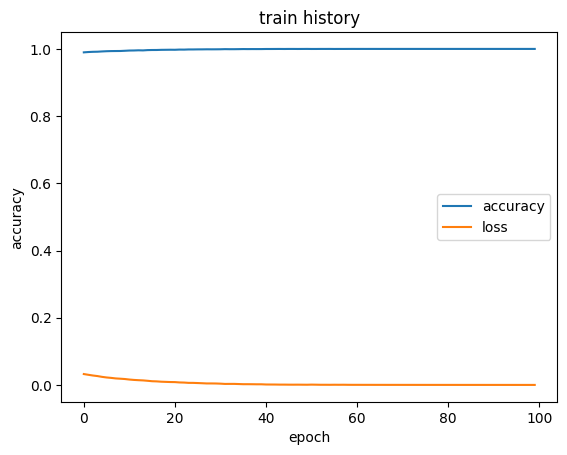

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['accuracy', 'loss'], loc='upper left')
plt.legend(['accuracy', 'loss'], loc=5)
plt.show()

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0411 - accuracy: 0.9909


In [17]:
preds = model.predict(x_train[0:1])
print(preds[0])
print(preds[0].sum())

1/1 [==============================] - 0s 284ms/step
[6.2601349e-19 8.9028965e-15 1.7405478e-25 1.3536270e-04 6.1925871e-26
 9.9986458e-01 5.6048439e-22 4.9740418e-19 1.9798839e-16 6.0193803e-16]
0.99999994


In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
modelfc = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelfc.summary()
modelfc.compile(optimizer = 'sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history = modelfc.fit(x_train, y_train, epochs=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('train history')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

loss, accuracy = modelfc.evaluate(x_test, y_test)

In [ ]:
from tensorflow.keras import backend as K

inp = model.input
outputs = [layer.output for layer in model.layers]
functors = [K.function([inp, keras.Input(shape=())], [out]) for out in outputs]

layer_id = 0
filter_id = 0
layerfn = functors[layer_id]
learning_phase = 0
out = layerfn([x_train[0:2], learning_phase])

print('out[0].shape =', out[0].shape)
result = out[0][0][:,:,filter_id:filter_id+1]

print('model result shape (with channel) = ', result.shape)

result_as_img = result.reshape((result.shape[0], result.shape[1]))
print(result_as_img.shape)

plt.imshow(x_train[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()
x_pos = 10
y_pos = 5
img3x3 = x_train[0][y_pos:y_pos+3, x_pos:x_pos+3, :].reshape((3,3))
print(img3x3)

In [ ]:
conv2d_l = model.layers[0]
weights = conv2d_l.get_weights()
w = weights[0]
b = weights[1]
print(w.shape, b.shape)
filter_id = 0
kernel = w[:,:,:,filter_id:filter_id+1]
kernel = kernel.reshape(3,3)
print(kernel)
bias = b[0]
print(bias)
print(img3x3)

In [ ]:
y = (kernel*img3x3).sum()+bias
if y < 0:
  y = 0
print(y)
print(result[y_pos][x_pos])